In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [3]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [4]:
s = 21.0
data = data[data[3]==s]
data.head()

,0,1,2,3,4,5,6,7
687835,2004-03-21,19:06:25.315774,0,21.0,88.2062,46.2297,30.36,2.32000
687836,2004-02-28,01:01:16.934932,7,21.0,19.5964,37.1620,114.08,2.69964
687837,2004-02-28,01:02:16.576578,9,21.0,19.4690,37.3679,114.08,2.69964
687838,2004-02-28,01:03:16.92293,11,21.0,19.3710,37.6765,114.08,2.69964
687839,2004-02-28,01:06:46.535847,18,21.0,19.1750,38.0529,108.56,2.69964


In [5]:
# print(S1df.shape)
outliersILista = []
outliersIListaV = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersILista.append(i)
        outliersIListaV.append(row[4])
print(data.shape, len(outliersILista))
# Removendo outliers no sensor
passo3= data.copy()
print(passo3.head())
print(passo3.shape)

(58525, 8) 20828
                 0                1   2     3        4        5       6  \
687835  2004-03-21  19:06:25.315774   0  21.0  88.2062  46.2297   30.36   
687836  2004-02-28  01:01:16.934932   7  21.0  19.5964  37.1620  114.08   
687837  2004-02-28  01:02:16.576578   9  21.0  19.4690  37.3679  114.08   
687838  2004-02-28   01:03:16.92293  11  21.0  19.3710  37.6765  114.08   
687839  2004-02-28  01:06:46.535847  18  21.0  19.1750  38.0529  108.56   

              7  
687835  2.32000  
687836  2.69964  
687837  2.69964  
687838  2.69964  
687839  2.69964  
(58525, 8)


In [6]:
passo3= passo3.drop(outliersILista)
print(passo3.shape)
passo3.to_csv('sensor.csv')
data = pd.read_csv("sensor.csv")
data.shape

(37697, 8)


(37697, 9)

In [7]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
# data.head(1)
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

21.0 
             0                1   2     3        4        5       6        7
0  2004-02-28  01:01:16.934932   7  21.0  19.5964  37.1620  114.08  2.69964
1  2004-02-28  01:02:16.576578   9  21.0  19.4690  37.3679  114.08  2.69964
2  2004-02-28   01:03:16.92293  11  21.0  19.3710  37.6765  114.08  2.69964
3  2004-02-28  01:06:46.535847  18  21.0  19.1750  38.0529  108.56  2.69964
4  2004-02-28  01:07:17.019376  19  21.0  19.1652  38.1213  108.56  2.69964
--------------------------------


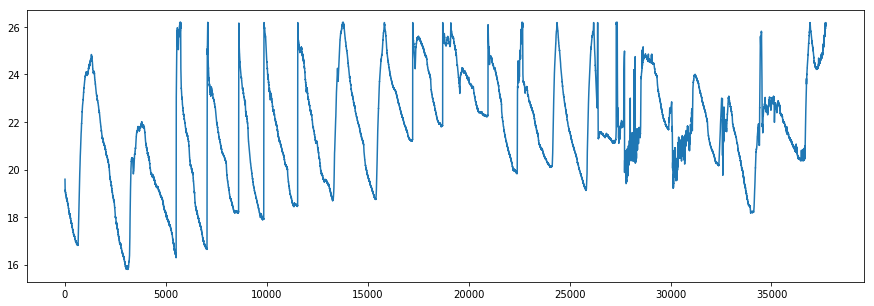

In [8]:
plt.figure(figsize = (15,5))
data[:data.shape[0]]['4'].plot()

In [9]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()


In [10]:
d = d.sort_values(['0','1'],ascending = [1,1])
d.shape, (d.tail())

((37697, 8),
                 0                1      2     3        4        5     6  \
 37693  2004-03-21  00:09:56.846966  63263  21.0  26.1232  44.7137  4.14   
 37694  2004-03-21  00:10:23.094886  63264  21.0  26.1134  44.7798  4.14   
 37695  2004-03-21   00:11:23.98317  63266  21.0  26.1428  44.8460  4.14   
 37696  2004-03-21  00:12:06.481439  63267  21.0  26.1134  44.7798  4.14   
 25384  2004-03-26  18:30:07.974202  43388  21.0      NaN      NaN   NaN   
 
              7  
 37693  2.33827  
 37694  2.33827  
 37695  2.33827  
 37696  2.33827  
 25384  2.25825  )

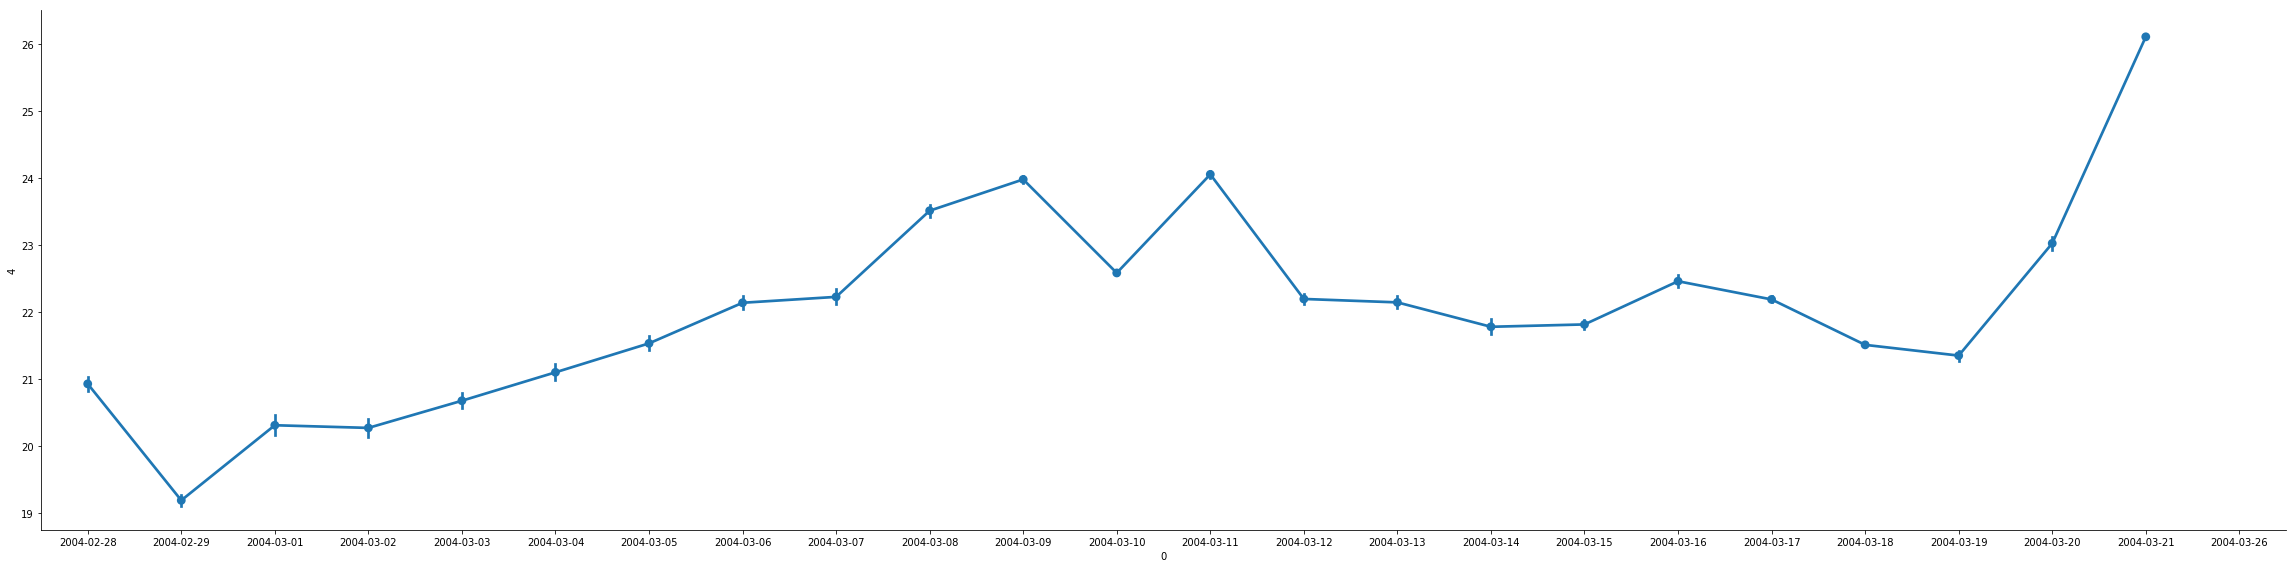

In [11]:
#plt.figure(figsize = (20,2))
sns.factorplot(x='0', y = '4', data = d, size = 8, aspect = 4)

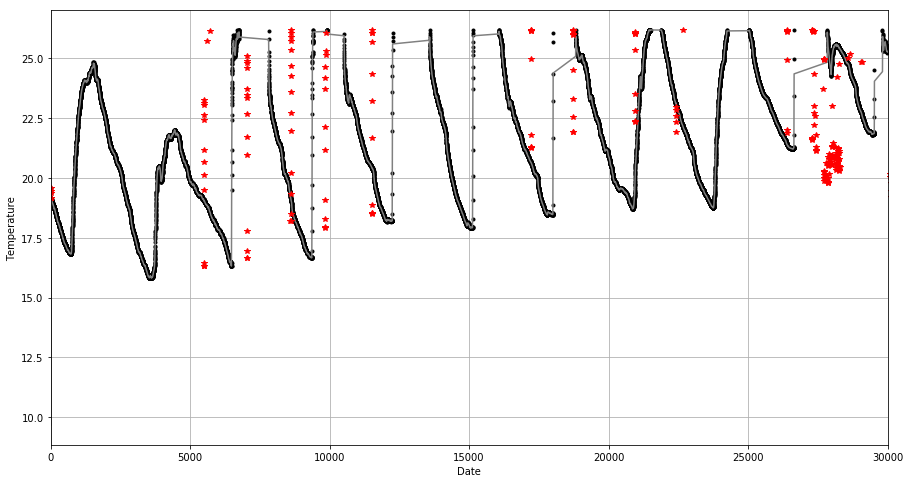

In [12]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")



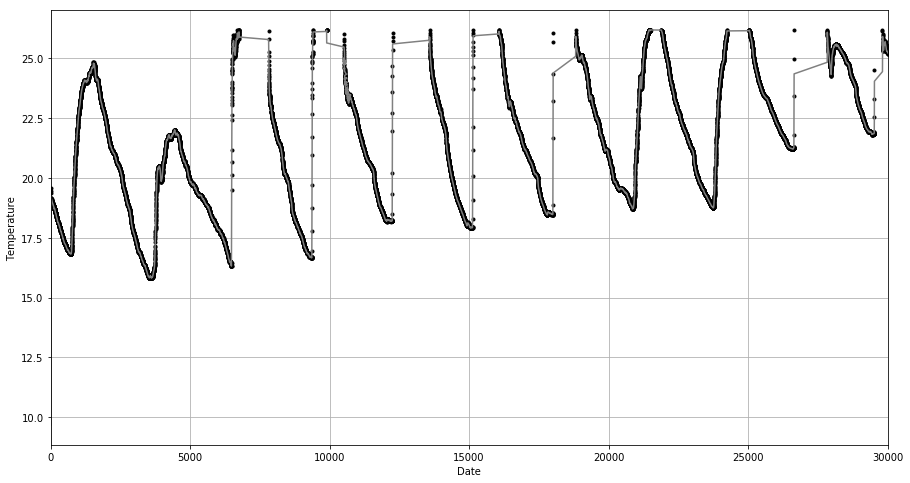

In [13]:
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

In [14]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(len(x_anomaly))
    return x_anomaly

x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

438


array([    0,     1,     2,     3,     4,  5503,  5504,  5505,  5506,
        5507,  5508,  5509,  5510,  5511,  5512,  5513,  5514,  5515,
        5552,  5555,  5567,  5568,  5596,  5731,  5734,  5735,  5736,
        5737,  7034,  7035,  7036,  7037,  7040,  7041,  7042,  7043,
        7044,  7045,  7047,  7048,  7049,  7050,  7058,  7077,  7078,
        7079,  7080,  7081,  7082,  7083,  7084,  7085,  7086,  7087,
        7088,  7089,  7090,  7091,  7092,  7093,  7094,  7095,  7096,
        7097,  7098,  7105,  7109,  7115,  7118,  7120,  7122,  7129,
        7133,  7135,  7136,  7137,  7140,  7149,  7151,  7153,  7154,
        7157,  7160,  7212,  8599,  8600,  8601,  8602,  8603,  8604,
        8605,  8606,  8607,  8608,  8609,  8610,  8611,  8612,  8613,
        9844,  9845,  9846,  9847,  9849,  9850,  9851,  9852,  9853,
        9854,  9855,  9856,  9857,  9858,  9860, 11523, 11524, 11525,
       11526, 11527, 11528, 11529, 11530, 11531, 11532, 11533, 17221,
       17222, 17223,

In [15]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)

(37697, 8)
(37259, 8)


438


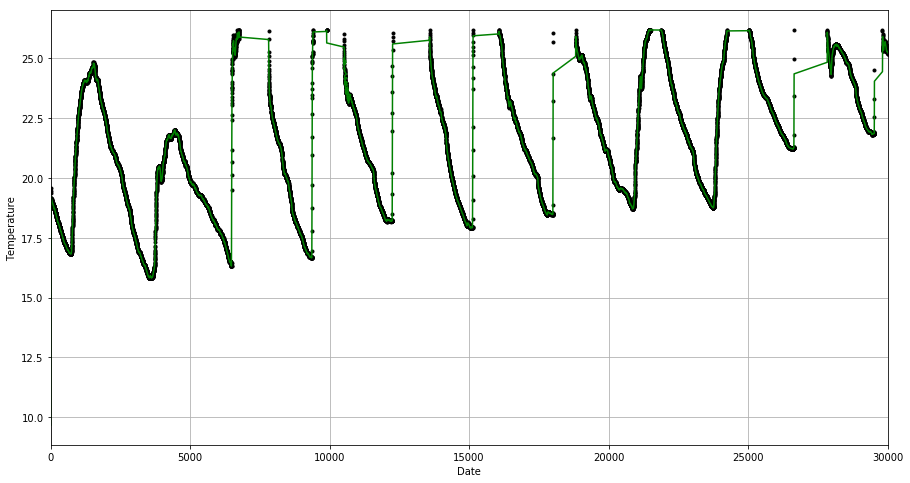

In [16]:
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

# Depois de ter os dados reconstruídos - verificamos a série temporal

4437


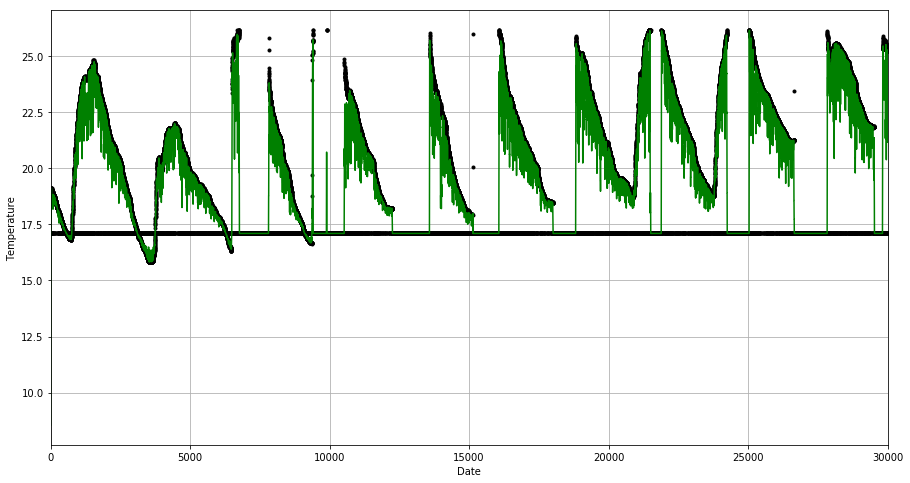

In [27]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


# Estatísticas Simples

In [17]:
dplot[dplot['Moteid']==s].shape
# Passo 0
sensor = s
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,58525,37.639654,33.65854,23.781,23.378782


In [18]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),37697,21.769181,2.295683,21.7818,1.864722


In [19]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

37259


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,37259,21.765837,2.296316,21.7916,1.865333


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [25]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.752492,2.887581,18.8418,2.594592


In [26]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )

  Data type   size       mean        SD  median        MAD
0  Raw Data  58525  37.639654  33.65854  23.781  23.378782
      Data type   size       mean        SD   median       MAD
0  step 1 (BOR)  37697  21.769181  2.295683  21.7818  1.864722
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  37259  21.765837  2.296316  21.7916  1.865333
  Data type   size       mean        SD   median       MAD
0    step 3  65536  19.752492  2.887581  18.8418  2.594592


##  Etapa para reconstruir as Épocas que estão faltando

In [20]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)
passoOEp = passoO['2'].tolist()
len(passoOEp)

idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))
# print('min max ',np.min(idInputEq), np.max(idInputNEq) )    

28278
65536 37258


In [21]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((37697, 8), int,              1
 2004-02-28  26)

In [22]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
dfOut.tail(10)


28278


,0,1,2,3,4,5,6,7
28268,2004-03-25,20:26:44.206904,65526,1.0,0,25.7419,57.04,2.20788
28269,2004-03-25,20:27:08.602428,65527,1.0,0,25.9226,57.04,2.20788
28270,2004-03-25,20:27:47.436497,65528,1.0,0,25.9587,57.04,2.20788
28271,2004-03-13,04:30:02.635654,65529,1.0,0,43.3858,41.40,2.50599
28272,2004-03-25,20:29:37.572996,65530,1.0,0,25.6696,57.04,2.20788
28273,2004-03-13,04:32:00.911101,65531,1.0,0,43.4524,41.40,2.50599
28274,2004-03-13,04:33:01.792602,65532,1.0,0,43.4524,41.40,2.50599
28275,2004-03-13,04:33:36.324864,65533,1.0,0,43.4524,41.40,2.50599
28276,2004-03-13,04:34:04.985883,65534,1.0,0,43.4524,41.40,2.50599
28277,2004-03-13,04:34:45.015041,65535,1.0,0,43.4524,41.40,2.50599


# Gerando o csv para fazer reconstrução dos dados

In [23]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(10)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(65537, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [24]:
final= pd.read_csv('finalsensor.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65537, 8))